<a href="https://colab.research.google.com/github/Lily-18/Retail/blob/main/Copy_of_Retail.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Problem Statement**
##### It is a critical requirement for business to understand the value derived from a customer. RFM is a method used for analyzing customer value.
##### Customer segmentation is the practice of segregating the customer base into groups of individuals based on some common characteristics such as age, gender, interests, and spending habits
##### Perform customer segmentation using RFM analysis. The resulting segments can be ordered from most valuable (highest recency, frequency, and value) to least valuable (lowest recency, frequency, and value).

## **Dataset Description**
##### This is a transnational data set which contains all the transactions that occurred between 01/12/2010 and 09/12/2011 for a UK-based and registered non-store online retail. The company mainly sells unique and all-occasion gifts.

### **Variables	Description**
##### InvoiceNo:	Invoice number. Nominal, a six digit integral number uniquely assigned to each transaction. If this code starts with letter 'c', it indicates a cancellation
##### StockCode:	Product (item) code. Nominal, a five digit integral number uniquely assigned to each distinct product
##### Description:	Product (item) name. Nominal
##### Quantity:	The quantities of each product (item) per transaction. Numeric
##### InvoiceDate:	Invoice Date and time. Numeric, the day and time when each transaction was generated
##### UnitPrice:	Unit price. Numeric, product price per unit in sterling
##### CustomerID:	Customer number. Nominal, a six digit integral number uniquely assigned to each customer
##### Country:	Country name. Nominal, the name of the country where each customer resides

## **WEEK 1: #1 DATA CLEANING**

In [ ]:
#import libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt
%matplotlib inline

In [ ]:
#load dataset
df_train = pd.read_excel('train.xlsx')
df_test = pd.read_excel('test.xlsx')

### 1. Perform a preliminary data inspection and data cleaning.

#### a. Check for missing data and formulate an apt strategy to treat them.

In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 379336 entries, 0 to 379335
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    379336 non-null  object        
 1   StockCode    379336 non-null  object        
 2   Description  378373 non-null  object        
 3   Quantity     379336 non-null  int64         
 4   InvoiceDate  379336 non-null  datetime64[ns]
 5   UnitPrice    379336 non-null  float64       
 6   CustomerID   285076 non-null  float64       
 7   Country      379336 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 23.2+ MB


In [ ]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 162573 entries, 0 to 162572
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    162573 non-null  object        
 1   StockCode    162573 non-null  object        
 2   Description  162082 non-null  object        
 3   Quantity     162573 non-null  int64         
 4   InvoiceDate  162573 non-null  datetime64[ns]
 5   UnitPrice    162573 non-null  float64       
 6   CustomerID   121753 non-null  float64       
 7   Country      162573 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 9.9+ MB


In [ ]:
df_train.shape

(379336, 8)

In [ ]:
df_test.shape

(162573, 8)

In [ ]:
df_train.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,558904,22292,HANGING CHICK YELLOW DECORATION,1,2011-07-04 16:18:00,1.25,NaN,United Kingdom
1,556072,20970,PINK FLORAL FELTCRAFT SHOULDER BAG,8,2011-06-08 14:57:00,3.75,16126.0,United Kingdom
2,551739,21559,STRAWBERRY LUNCH BOX WITH CUTLERY,2,2011-05-04 10:58:00,2.55,18118.0,United Kingdom
3,541658,21988,PACK OF 6 SKULL PAPER PLATES,1,2011-01-20 12:16:00,0.85,15529.0,United Kingdom
4,538364,85099C,JUMBO BAG BAROQUE BLACK WHITE,10,2010-12-10 17:26:00,1.95,14448.0,United Kingdom


In [ ]:
df_test.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,562955,84660c,PINK STITCHED WALL CLOCK,3,2011-08-11 10:14:00,7.46,NaN,United Kingdom
1,548451,22707,WRAP MONSTER FUN,50,2011-03-31 11:25:00,0.42,17365.0,United Kingdom
2,568180,22534,MAGIC DRAWING SLATE SPACEBOY,12,2011-09-25 13:42:00,0.42,15429.0,United Kingdom
3,577078,47369B,BLUE GREEN EMBROIDERY COSMETIC BAG,1,2011-11-17 15:17:00,5.79,NaN,United Kingdom
4,C569891,22720,SET OF 3 CAKE TINS PANTRY DESIGN,-2,2011-10-06 15:46:00,4.95,13924.0,United Kingdom


In [ ]:
df_train.tail()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
379331,C554864,22962,JAM JAR WITH PINK LID,-4,2011-05-27 10:36:00,0.85,15122.0,United Kingdom
379332,539451,20749,ASSORTED COLOUR MINI CASES,1,2010-12-17 16:59:00,16.98,NaN,United Kingdom
379333,572302,22091,EMPIRE TISSUE BOX,1,2011-10-23 14:47:00,0.39,15427.0,United Kingdom
379334,559339,84946,ANTIQUE SILVER T-LIGHT GLASS,60,2011-07-07 16:49:00,1.25,13752.0,United Kingdom
379335,576771,23159,SET OF 5 PANCAKE DAY MAGNETS,12,2011-11-16 13:19:00,2.08,13285.0,United Kingdom


In [ ]:
df_train.dtypes

InvoiceNo              object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
UnitPrice             float64
CustomerID            float64
Country                object
dtype: object

In [ ]:
df_test.dtypes

InvoiceNo              object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
UnitPrice             float64
CustomerID            float64
Country                object
dtype: object

In [ ]:
#checking missing values
df_train.isnull().sum()

InvoiceNo          0
StockCode          0
Description      963
Quantity           0
InvoiceDate        0
UnitPrice          0
CustomerID     94260
Country            0
dtype: int64

In [ ]:
df_test.isnull().sum()

InvoiceNo          0
StockCode          0
Description      491
Quantity           0
InvoiceDate        0
UnitPrice          0
CustomerID     40820
Country            0
dtype: int64

In [ ]:
#determine the percentage of missing values
(df_train.isnull().sum()/len(df_train))*100

InvoiceNo       0.000000
StockCode       0.000000
Description     0.253865
Quantity        0.000000
InvoiceDate     0.000000
UnitPrice       0.000000
CustomerID     24.848683
Country         0.000000
dtype: float64

In [ ]:
(df_test.isnull().sum()/len(df_test))*100

InvoiceNo       0.000000
StockCode       0.000000
Description     0.302018
Quantity        0.000000
InvoiceDate     0.000000
UnitPrice       0.000000
CustomerID     25.108720
Country         0.000000
dtype: float64

In [ ]:
# Determine the appropriate treatment strategy for missing values
# For categorical variables like CustomerID, drop rows with missing values
df_train.dropna(subset=['CustomerID'], inplace=True)
df_train.dropna(subset=['Description'], inplace=True)

In [ ]:
df_test.dropna(subset=['CustomerID'], inplace=True)
df_test.dropna(subset=['Description'], inplace=True)

In [ ]:
#checking missing values
df_train.isnull().sum().any()

False

In [ ]:
df_test.isnull().sum().any()

False

#### b. Remove duplicate data records.

In [ ]:
#finding duplicate values in the dataset
train_dup = df_train[df_train.duplicated()]

In [ ]:
#check number of rows and columns in duplicate daatasets
train_dup.shape

(2656, 8)

In [ ]:
#deleting duplicate values from the dataset
df_train.drop_duplicates(keep='first',inplace=True)

In [ ]:
test_dup = df_test[df_test.duplicated()]

In [ ]:
test_dup.shape

(468, 8)

In [ ]:
 df_test.drop_duplicates(keep='first',inplace=True)

In [ ]:
#checking number of rows and columns after deleting duplicates in the dataset
df_train.shape

(282420, 8)

In [ ]:
df_test.shape

(121285, 8)

#### c. Perform descriptive analytics on the given data.

In [ ]:
#summary statistics
df_train.describe()

,Quantity,UnitPrice,CustomerID
count,282420.000000,282420.000000,282420.000000
mean,12.110283,3.526323,15283.894880
std,297.109127,80.691250,1712.665383
min,-80995.000000,0.000000,12346.000000
25%,2.000000,1.250000,13952.000000
50%,5.000000,1.950000,15150.000000
75%,12.000000,3.750000,16788.000000
max,80995.000000,38970.000000,18287.000000


In [ ]:
df_test.describe()

,Quantity,UnitPrice,CustomerID
count,121285.000000,121285.000000,121285.000000
mean,12.174391,3.333832,15284.152591
std,43.437378,30.895324,1716.802994
min,-2000.000000,0.000000,12347.000000
25%,2.000000,1.250000,13931.000000
50%,5.000000,1.950000,15150.000000
75%,12.000000,3.750000,16791.000000
max,3114.000000,8142.750000,18287.000000


In [ ]:
# check the unique values
df_train.nunique()

InvoiceNo      20980
StockCode       3631
Description     3833
Quantity         385
InvoiceDate    19427
UnitPrice        525
CustomerID      4353
Country           37
dtype: int64

In [ ]:
df_test.nunique()

InvoiceNo      18209
StockCode       3419
Description     3564
Quantity         268
InvoiceDate    17043
UnitPrice        385
CustomerID      4224
Country           37
dtype: int64

In [ ]:
# check the correlation
df_train.corr()

<ipython-input-32-980973473175>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_train.corr()


,Quantity,UnitPrice,CustomerID
Quantity,1.000000,-0.000929,-0.002909
UnitPrice,-0.000929,1.000000,-0.004429
CustomerID,-0.002909,-0.004429,1.000000


In [ ]:
df_test.corr()

<ipython-input-33-04f2c38fc1b7>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_test.corr()


,Quantity,UnitPrice,CustomerID
Quantity,1.000000,-0.014790,-0.020972
UnitPrice,-0.014790,1.000000,-0.007141
CustomerID,-0.020972,-0.007141,1.000000


## **WEEK 1: #2 DATA TRANSFORMATION**

### 2. Perform cohort analysis (a cohort is a group of subjects that share a defining characteristic). Observe how a cohort behaves across time and compare it to other cohorts.

#### a. Create month cohorts and analyze active customers for each cohort.

In [ ]:
#create function for month
def get_month(x):
  return dt.datetime(x.year,x.month,1)

In [ ]:
# Apply the function to the invoice date to create invoice month
df_train['Invoice_month'] = df_train['InvoiceDate'].apply(get_month)

In [ ]:
df_train

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Invoice_month
1,556072,20970,PINK FLORAL FELTCRAFT SHOULDER BAG,8,2011-06-08 14:57:00,3.75,16126.0,United Kingdom,2011-06-01
2,551739,21559,STRAWBERRY LUNCH BOX WITH CUTLERY,2,2011-05-04 10:58:00,2.55,18118.0,United Kingdom,2011-05-01
3,541658,21988,PACK OF 6 SKULL PAPER PLATES,1,2011-01-20 12:16:00,0.85,15529.0,United Kingdom,2011-01-01
4,538364,85099C,JUMBO BAG BAROQUE BLACK WHITE,10,2010-12-10 17:26:00,1.95,14448.0,United Kingdom,2010-12-01
5,552306,84789,ENCHANTED BIRD PLANT CAGE,4,2011-05-08 15:20:00,3.75,13911.0,United Kingdom,2011-05-01
...,...,...,...,...,...,...,...,...,...
379330,553872,21937,STRAWBERRY PICNIC BAG,5,2011-05-19 14:35:00,2.95,13050.0,United Kingdom,2011-05-01
379331,C554864,22962,JAM JAR WITH PINK LID,-4,2011-05-27 10:36:00,0.85,15122.0,United Kingdom,2011-05-01
379333,572302,22091,EMPIRE TISSUE BOX,1,2011-10-23 14:47:00,0.39,15427.0,United Kingdom,2011-10-01
379334,559339,84946,ANTIQUE SILVER T-LIGHT GLASS,60,2011-07-07 16:49:00,1.25,13752.0,United Kingdom,2011-07-01


In [ ]:
df_test['Invoice_month'] = df_test['InvoiceDate'].apply(get_month)

In [ ]:
df_test

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Invoice_month
1,548451,22707,WRAP MONSTER FUN,50,2011-03-31 11:25:00,0.42,17365.0,United Kingdom,2011-03-01
2,568180,22534,MAGIC DRAWING SLATE SPACEBOY,12,2011-09-25 13:42:00,0.42,15429.0,United Kingdom,2011-09-01
4,C569891,22720,SET OF 3 CAKE TINS PANTRY DESIGN,-2,2011-10-06 15:46:00,4.95,13924.0,United Kingdom,2011-10-01
6,538795,82482,WOODEN PICTURE FRAME WHITE FINISH,6,2010-12-14 11:42:00,2.55,13267.0,United Kingdom,2010-12-01
8,561968,23077,DOUGHNUT LIP GLOSS,20,2011-08-01 13:29:00,1.25,16332.0,United Kingdom,2011-08-01
...,...,...,...,...,...,...,...,...,...
162568,574102,22866,HAND WARMER SCOTTY DOG DESIGN,24,2011-11-03 10:27:00,2.10,16128.0,United Kingdom,2011-11-01
162569,545226,22919,HERB MARKER MINT,12,2011-03-01 09:33:00,0.65,12428.0,Finland,2011-03-01
162570,573160,22077,6 RIBBONS RUSTIC CHARM,12,2011-10-28 08:58:00,1.95,14359.0,United Kingdom,2011-10-01
162571,552321,23204,CHARLOTTE BAG APPLES DESIGN,10,2011-05-09 09:15:00,0.85,17049.0,United Kingdom,2011-05-01


In [ ]:
#create a column index with the minimum invoice aka first time the customer was acquired
df_train['Cohort_month'] = df_train.groupby('CustomerID')['Invoice_month'].transform('min')

In [ ]:
df_train

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Invoice_month,Cohort_month
1,556072,20970,PINK FLORAL FELTCRAFT SHOULDER BAG,8,2011-06-08 14:57:00,3.75,16126.0,United Kingdom,2011-06-01,2011-02-01
2,551739,21559,STRAWBERRY LUNCH BOX WITH CUTLERY,2,2011-05-04 10:58:00,2.55,18118.0,United Kingdom,2011-05-01,2010-12-01
3,541658,21988,PACK OF 6 SKULL PAPER PLATES,1,2011-01-20 12:16:00,0.85,15529.0,United Kingdom,2011-01-01,2010-12-01
4,538364,85099C,JUMBO BAG BAROQUE BLACK WHITE,10,2010-12-10 17:26:00,1.95,14448.0,United Kingdom,2010-12-01,2010-12-01
5,552306,84789,ENCHANTED BIRD PLANT CAGE,4,2011-05-08 15:20:00,3.75,13911.0,United Kingdom,2011-05-01,2011-02-01
...,...,...,...,...,...,...,...,...,...,...
379330,553872,21937,STRAWBERRY PICNIC BAG,5,2011-05-19 14:35:00,2.95,13050.0,United Kingdom,2011-05-01,2010-12-01
379331,C554864,22962,JAM JAR WITH PINK LID,-4,2011-05-27 10:36:00,0.85,15122.0,United Kingdom,2011-05-01,2011-02-01
379333,572302,22091,EMPIRE TISSUE BOX,1,2011-10-23 14:47:00,0.39,15427.0,United Kingdom,2011-10-01,2011-10-01
379334,559339,84946,ANTIQUE SILVER T-LIGHT GLASS,60,2011-07-07 16:49:00,1.25,13752.0,United Kingdom,2011-07-01,2011-04-01


In [ ]:
df_test['Cohort_month'] = df_test.groupby('CustomerID')['Invoice_month'].transform('min')

In [ ]:
df_test

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Invoice_month,Cohort_month
1,548451,22707,WRAP MONSTER FUN,50,2011-03-31 11:25:00,0.42,17365.0,United Kingdom,2011-03-01,2011-01-01
2,568180,22534,MAGIC DRAWING SLATE SPACEBOY,12,2011-09-25 13:42:00,0.42,15429.0,United Kingdom,2011-09-01,2011-09-01
4,C569891,22720,SET OF 3 CAKE TINS PANTRY DESIGN,-2,2011-10-06 15:46:00,4.95,13924.0,United Kingdom,2011-10-01,2011-09-01
6,538795,82482,WOODEN PICTURE FRAME WHITE FINISH,6,2010-12-14 11:42:00,2.55,13267.0,United Kingdom,2010-12-01,2010-12-01
8,561968,23077,DOUGHNUT LIP GLOSS,20,2011-08-01 13:29:00,1.25,16332.0,United Kingdom,2011-08-01,2011-02-01
...,...,...,...,...,...,...,...,...,...,...
162568,574102,22866,HAND WARMER SCOTTY DOG DESIGN,24,2011-11-03 10:27:00,2.10,16128.0,United Kingdom,2011-11-01,2011-03-01
162569,545226,22919,HERB MARKER MINT,12,2011-03-01 09:33:00,0.65,12428.0,Finland,2011-03-01,2011-03-01
162570,573160,22077,6 RIBBONS RUSTIC CHARM,12,2011-10-28 08:58:00,1.95,14359.0,United Kingdom,2011-10-01,2011-09-01
162571,552321,23204,CHARLOTTE BAG APPLES DESIGN,10,2011-05-09 09:15:00,0.85,17049.0,United Kingdom,2011-05-01,2011-03-01


In [ ]:
#Date element function to get a series of substraction
def get_date_element(df,column):
  day = df[column].dt.day
  month = df[column].dt.month
  year = df[column].dt.year
  return day,month,year

In [ ]:
#Get date element for our invoice and cohort month
_train,Invoice_month_train,Invoice_year_train = get_date_element(df_train,'Invoice_month')
_train,Cohort_month_train,Cohort_year_train = get_date_element(df_train,'Cohort_month')

In [ ]:
_test,Invoice_month_test,Invoice_year_test = get_date_element(df_test,'Invoice_month')
_test,Cohort_month_test,Cohort_year_test = get_date_element(df_test,'Cohort_month')

In [ ]:
# Create the cohort index
# Adding 1 is optional as there may be customer who were there
#in only in one month, for those customer we don't want data to be 0 that is why we are adding 1

year_diff_train = Invoice_year_train - Cohort_year_train
month_diff_train = Invoice_month_train - Cohort_month_train
df_train['Cohort_Index'] = year_diff_train*12 + month_diff_train + 1

In [ ]:
df_train['Cohort_Index'].nunique()

13

In [ ]:
df_train

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Invoice_month,Cohort_month,Cohort_Index
1,556072,20970,PINK FLORAL FELTCRAFT SHOULDER BAG,8,2011-06-08 14:57:00,3.75,16126.0,United Kingdom,2011-06-01,2011-02-01,5
2,551739,21559,STRAWBERRY LUNCH BOX WITH CUTLERY,2,2011-05-04 10:58:00,2.55,18118.0,United Kingdom,2011-05-01,2010-12-01,6
3,541658,21988,PACK OF 6 SKULL PAPER PLATES,1,2011-01-20 12:16:00,0.85,15529.0,United Kingdom,2011-01-01,2010-12-01,2
4,538364,85099C,JUMBO BAG BAROQUE BLACK WHITE,10,2010-12-10 17:26:00,1.95,14448.0,United Kingdom,2010-12-01,2010-12-01,1
5,552306,84789,ENCHANTED BIRD PLANT CAGE,4,2011-05-08 15:20:00,3.75,13911.0,United Kingdom,2011-05-01,2011-02-01,4
...,...,...,...,...,...,...,...,...,...,...,...
379330,553872,21937,STRAWBERRY PICNIC BAG,5,2011-05-19 14:35:00,2.95,13050.0,United Kingdom,2011-05-01,2010-12-01,6
379331,C554864,22962,JAM JAR WITH PINK LID,-4,2011-05-27 10:36:00,0.85,15122.0,United Kingdom,2011-05-01,2011-02-01,4
379333,572302,22091,EMPIRE TISSUE BOX,1,2011-10-23 14:47:00,0.39,15427.0,United Kingdom,2011-10-01,2011-10-01,1
379334,559339,84946,ANTIQUE SILVER T-LIGHT GLASS,60,2011-07-07 16:49:00,1.25,13752.0,United Kingdom,2011-07-01,2011-04-01,4


In [ ]:
year_diff_test = Invoice_year_test - Cohort_year_test
month_diff_test = Invoice_month_test - Cohort_month_test
df_test['Cohort_Index'] = year_diff_test*12 + month_diff_test + 1

In [ ]:
df_train

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Invoice_month,Cohort_month,Cohort_Index
1,556072,20970,PINK FLORAL FELTCRAFT SHOULDER BAG,8,2011-06-08 14:57:00,3.75,16126.0,United Kingdom,2011-06-01,2011-02-01,5
2,551739,21559,STRAWBERRY LUNCH BOX WITH CUTLERY,2,2011-05-04 10:58:00,2.55,18118.0,United Kingdom,2011-05-01,2010-12-01,6
3,541658,21988,PACK OF 6 SKULL PAPER PLATES,1,2011-01-20 12:16:00,0.85,15529.0,United Kingdom,2011-01-01,2010-12-01,2
4,538364,85099C,JUMBO BAG BAROQUE BLACK WHITE,10,2010-12-10 17:26:00,1.95,14448.0,United Kingdom,2010-12-01,2010-12-01,1
5,552306,84789,ENCHANTED BIRD PLANT CAGE,4,2011-05-08 15:20:00,3.75,13911.0,United Kingdom,2011-05-01,2011-02-01,4
...,...,...,...,...,...,...,...,...,...,...,...
379330,553872,21937,STRAWBERRY PICNIC BAG,5,2011-05-19 14:35:00,2.95,13050.0,United Kingdom,2011-05-01,2010-12-01,6
379331,C554864,22962,JAM JAR WITH PINK LID,-4,2011-05-27 10:36:00,0.85,15122.0,United Kingdom,2011-05-01,2011-02-01,4
379333,572302,22091,EMPIRE TISSUE BOX,1,2011-10-23 14:47:00,0.39,15427.0,United Kingdom,2011-10-01,2011-10-01,1
379334,559339,84946,ANTIQUE SILVER T-LIGHT GLASS,60,2011-07-07 16:49:00,1.25,13752.0,United Kingdom,2011-07-01,2011-04-01,4


In [ ]:
# count the customer Id by groupying by Cohort Index and Cohort month
Cohort_table_train = df_train.groupby(['Cohort_month','Cohort_Index'])['CustomerID'].apply(pd.Series.nunique).reset_index()
Cohort_table_train

,Cohort_month,Cohort_Index,CustomerID
0,2010-12-01,1,929
1,2010-12-01,2,350
2,2010-12-01,3,297
3,2010-12-01,4,353
4,2010-12-01,5,332
...,...,...,...
86,2011-10-01,2,91
87,2011-10-01,3,45
88,2011-11-01,1,323
89,2011-11-01,2,41


In [ ]:
Cohort_table_test = df_test.groupby(['Cohort_month','Cohort_Index'])['CustomerID'].apply(pd.Series.nunique).reset_index()
Cohort_table_test

,Cohort_month,Cohort_Index,CustomerID
0,2010-12-01,1,860
1,2010-12-01,2,306
2,2010-12-01,3,282
3,2010-12-01,4,330
4,2010-12-01,5,305
...,...,...,...
86,2011-10-01,2,80
87,2011-10-01,3,36
88,2011-11-01,1,324
89,2011-11-01,2,39


#### **Active customer for each cohort**

In [ ]:
# Create Pivot Table
Final_cohort_table_train = Cohort_table_train.pivot(index='Cohort_month',columns='Cohort_Index',values='CustomerID')
Final_cohort_table_train

Cohort_Index,1,2,3,4,5,6,7,8,9,10,11,12,13
Cohort_month,,,,,,,,,,,,,
2010-12-01,929.0,350.0,297.0,353.0,332.0,367.0,351.0,322.0,325.0,361.0,344.0,460.0,248.0
2011-01-01,422.0,102.0,120.0,104.0,141.0,122.0,113.0,109.0,132.0,148.0,157.0,66.0,NaN
2011-02-01,377.0,91.0,72.0,101.0,102.0,91.0,95.0,101.0,97.0,117.0,32.0,NaN,NaN
2011-03-01,441.0,81.0,110.0,93.0,101.0,76.0,113.0,103.0,125.0,37.0,NaN,NaN,NaN
2011-04-01,298.0,67.0,65.0,60.0,61.0,71.0,69.0,78.0,23.0,NaN,NaN,NaN,NaN
2011-05-01,278.0,60.0,48.0,48.0,59.0,69.0,74.0,29.0,NaN,NaN,NaN,NaN,NaN
2011-06-01,238.0,46.0,43.0,62.0,57.0,80.0,25.0,NaN,NaN,NaN,NaN,NaN,NaN
2011-07-01,192.0,39.0,38.0,45.0,55.0,21.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-08-01,166.0,38.0,41.0,41.0,23.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
Final_cohort_table_test = Cohort_table_test.pivot(index='Cohort_month',columns='Cohort_Index',values='CustomerID')
Final_cohort_table_test

Cohort_Index,1,2,3,4,5,6,7,8,9,10,11,12,13
Cohort_month,,,,,,,,,,,,,
2010-12-01,860.0,306.0,282.0,330.0,305.0,337.0,324.0,294.0,299.0,333.0,326.0,435.0,227.0
2011-01-01,407.0,93.0,111.0,91.0,132.0,115.0,105.0,101.0,123.0,127.0,144.0,55.0,NaN
2011-02-01,355.0,72.0,68.0,95.0,86.0,85.0,91.0,96.0,85.0,107.0,30.0,NaN,NaN
2011-03-01,427.0,72.0,106.0,93.0,99.0,79.0,105.0,102.0,122.0,39.0,NaN,NaN,NaN
2011-04-01,292.0,59.0,55.0,56.0,53.0,70.0,64.0,75.0,22.0,NaN,NaN,NaN,NaN
2011-05-01,275.0,55.0,46.0,45.0,58.0,64.0,72.0,25.0,NaN,NaN,NaN,NaN,NaN
2011-06-01,231.0,36.0,35.0,59.0,54.0,73.0,21.0,NaN,NaN,NaN,NaN,NaN,NaN
2011-07-01,191.0,34.0,40.0,43.0,49.0,22.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-08-01,162.0,36.0,37.0,39.0,21.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<Axes: xlabel='Cohort_Index', ylabel='Cohort_month'>

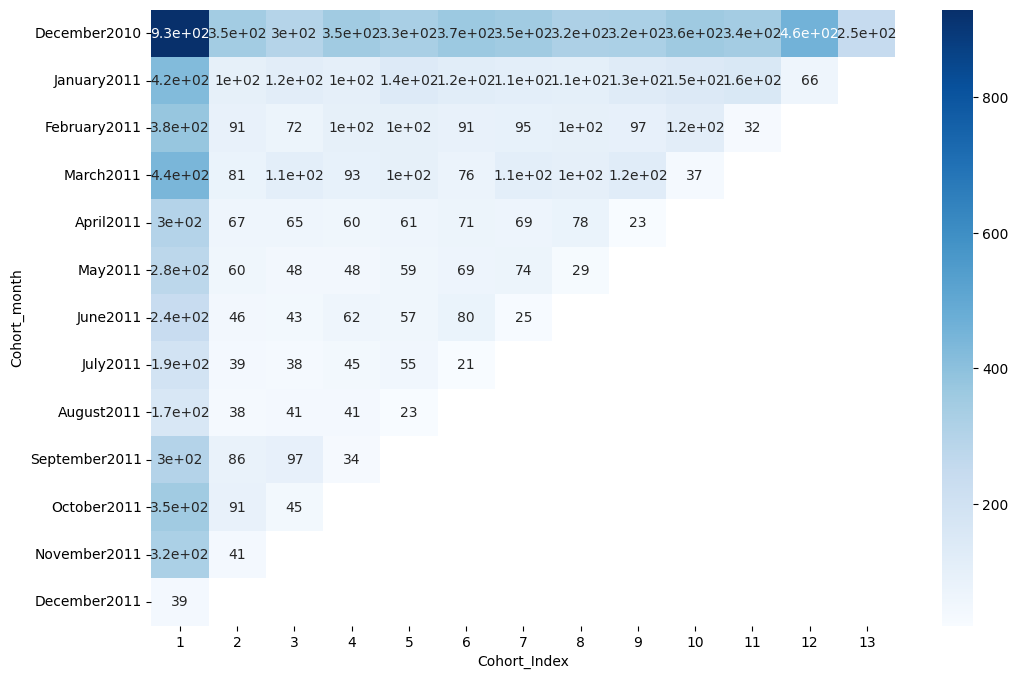

In [ ]:
# Set the index
Final_cohort_table_train.index = Final_cohort_table_train.index.strftime('%B%Y')
# create a HeatMap for train dataset
plt.figure(figsize=(12,8))
sns.heatmap(Final_cohort_table_train,annot=True,cmap='Blues')

<Axes: xlabel='Cohort_Index', ylabel='Cohort_month'>

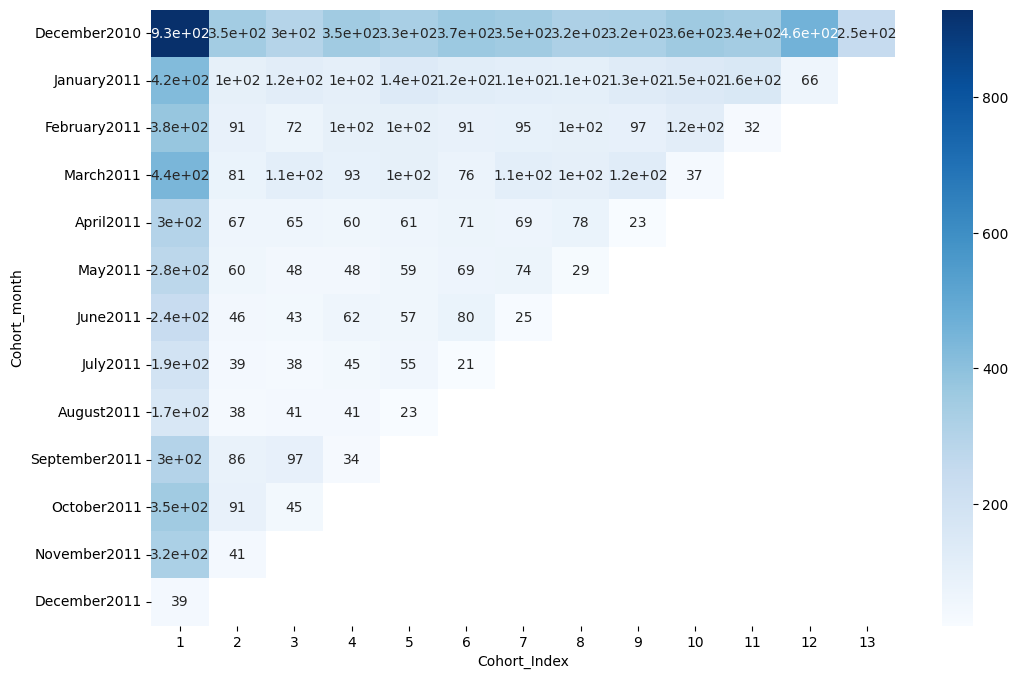

In [ ]:
# Set the index
Final_cohort_table_test.index = Final_cohort_table_test.index.strftime('%B%Y')
#Create a heatmap for test dataset
plt.figure(figsize=(12,8))
sns.heatmap(Final_cohort_table_train,annot=True,cmap='Blues')

#### **Analyze the retention rate of customers.**

In [ ]:
#Create a percentage cohort heatmap for train dataset
P_cohort_table_train = Final_cohort_table_train.divide(Final_cohort_table_train.iloc[:,0],axis=0)
P_cohort_table_train

Cohort_Index,1,2,3,4,5,6,7,8,9,10,11,12,13
Cohort_month,,,,,,,,,,,,,
December2010,1.0,0.376749,0.319699,0.379978,0.357374,0.395048,0.377826,0.346609,0.349839,0.388590,0.370291,0.495156,0.266954
January2011,1.0,0.241706,0.284360,0.246445,0.334123,0.289100,0.267773,0.258294,0.312796,0.350711,0.372038,0.156398,NaN
February2011,1.0,0.241379,0.190981,0.267905,0.270557,0.241379,0.251989,0.267905,0.257294,0.310345,0.084881,NaN,NaN
March2011,1.0,0.183673,0.249433,0.210884,0.229025,0.172336,0.256236,0.233560,0.283447,0.083900,NaN,NaN,NaN
April2011,1.0,0.224832,0.218121,0.201342,0.204698,0.238255,0.231544,0.261745,0.077181,NaN,NaN,NaN,NaN
May2011,1.0,0.215827,0.172662,0.172662,0.212230,0.248201,0.266187,0.104317,NaN,NaN,NaN,NaN,NaN
June2011,1.0,0.193277,0.180672,0.260504,0.239496,0.336134,0.105042,NaN,NaN,NaN,NaN,NaN,NaN
July2011,1.0,0.203125,0.197917,0.234375,0.286458,0.109375,NaN,NaN,NaN,NaN,NaN,NaN,NaN
August2011,1.0,0.228916,0.246988,0.246988,0.138554,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<Axes: xlabel='Cohort_Index', ylabel='Cohort_month'>

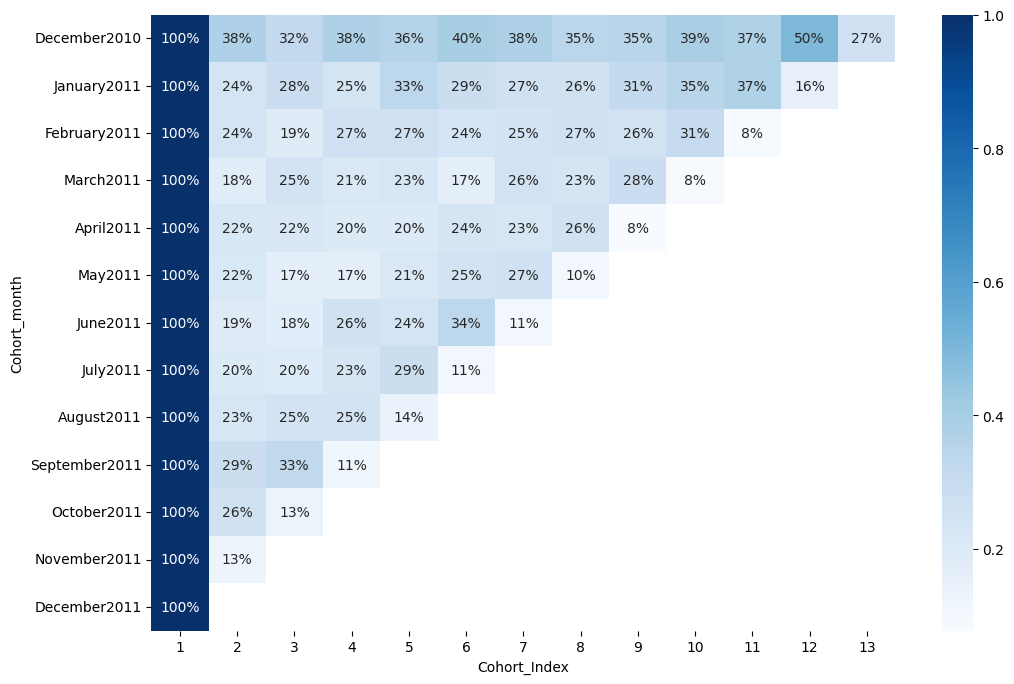

In [ ]:
# Visualize Retention rate of customer using heatmap
plt.figure(figsize=(12,8))
sns.heatmap(P_cohort_table_train,annot=True,cmap='Blues',fmt='.0%') # fmt is used to convert the numbers to %age format

##### * Blocks of dark squares in dec 2010 indicates high retention rates and in march 2011 blocks of light squares indicates low retention rates.
##### * In june 2011 cohort the retention rate is gradually increasing over a period of time.
##### * In Dec 2010 cohort in the period of 1 year 27% of customers are retained and can be classified as loyal customers.
##### * February,March and April cohort showed very less retention rate of only 8%.

In [ ]:
#Create a percentage cohort heatmap for test dataset
P_cohort_table_test = Final_cohort_table_test.divide(Final_cohort_table_test.iloc[:,0],axis=0)
P_cohort_table_test

Cohort_Index,1,2,3,4,5,6,7,8,9,10,11,12,13
Cohort_month,,,,,,,,,,,,,
December2010,1.0,0.355814,0.327907,0.383721,0.354651,0.391860,0.376744,0.341860,0.347674,0.387209,0.379070,0.505814,0.263953
January2011,1.0,0.228501,0.272727,0.223587,0.324324,0.282555,0.257985,0.248157,0.302211,0.312039,0.353808,0.135135,NaN
February2011,1.0,0.202817,0.191549,0.267606,0.242254,0.239437,0.256338,0.270423,0.239437,0.301408,0.084507,NaN,NaN
March2011,1.0,0.168618,0.248244,0.217799,0.231850,0.185012,0.245902,0.238876,0.285714,0.091335,NaN,NaN,NaN
April2011,1.0,0.202055,0.188356,0.191781,0.181507,0.239726,0.219178,0.256849,0.075342,NaN,NaN,NaN,NaN
May2011,1.0,0.200000,0.167273,0.163636,0.210909,0.232727,0.261818,0.090909,NaN,NaN,NaN,NaN,NaN
June2011,1.0,0.155844,0.151515,0.255411,0.233766,0.316017,0.090909,NaN,NaN,NaN,NaN,NaN,NaN
July2011,1.0,0.178010,0.209424,0.225131,0.256545,0.115183,NaN,NaN,NaN,NaN,NaN,NaN,NaN
August2011,1.0,0.222222,0.228395,0.240741,0.129630,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<Axes: xlabel='Cohort_Index', ylabel='Cohort_month'>

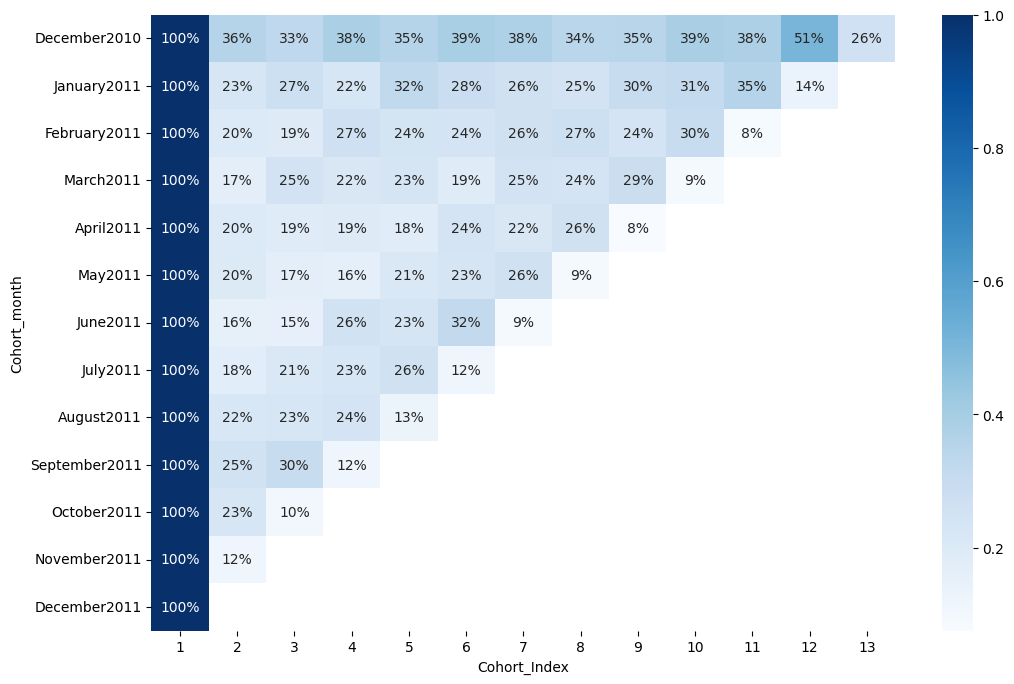

In [ ]:
# Visualize retention rate of customer using heatmap
plt.figure(figsize=(12,8))
sns.heatmap(P_cohort_table_test,annot=True,cmap='Blues',fmt='.0%') # fmt is used to convert the numbers to %age format

WEEK-2

**Data Modeling :**

1. Build a RFM (Recency Frequency Monetary) model. Recency means the number of days since a customer made the last purchase. Frequency is the number of purchase in a given period. It could be 3 months, 6 months or 1 year. Monetary is the total amount of money a customer spent in that given period. Therefore, big spenders will be differentiated among other customers such as MVP (Minimum Viable Product) or VIP.

In [ ]:
# for finding recency
day = '2012-01-01'# let this be our present day for our dataset
day = pd.to_datetime(day)

In [ ]:
# Recency Metric
#Output in No.of days
Recency_train = df_train.groupby(['CustomerID']).agg({'Invoice_month':lambda x:((day-x.max()).days)})
Recency_train.head()

,Invoice_month
CustomerID,
12346.0,365
12347.0,31
12348.0,122
12349.0,61
12350.0,334


In [ ]:
# Recency Metric
#Output in No.of days
Recency_test = df_test.groupby(['CustomerID']).agg({'Invoice_month':lambda x:((day-x.max()).days)})
Recency_test.head()

,Invoice_month
CustomerID,
12347.0,31
12348.0,122
12349.0,61
12350.0,334
12352.0,61


In [ ]:
# for getting the values in month
df_train['Invoice_month'] = pd.to_datetime(df_train['InvoiceDate']).dt.to_period('M')
# take present day as 1 month later by the max invoice date
Present_month = df_train['Invoice_month'].max()+1
recency_train_M = df_train.groupby(['CustomerID']).agg({'Invoice_month':lambda x:((Present_month-x.max()).n)})
recency_train_M.head()

,Invoice_month
CustomerID,
12346.0,12
12347.0,1
12348.0,4
12349.0,2
12350.0,11


In [ ]:
# for getting the values in month
df_test['Invoice_month'] = pd.to_datetime(df_test['InvoiceDate']).dt.to_period('M')
# take present day as 1 month later by the max invoice date
Present_month_test = df_test['Invoice_month'].max()+1
recency_test_M = df_test.groupby(['CustomerID']).agg({'Invoice_month':lambda x:((Present_month_test-x.max()).n)})
recency_test_M

,Invoice_month
CustomerID,
12347.0,1
12348.0,4
12349.0,2
12350.0,11
12352.0,2
...,...
18280.0,10
18281.0,7
18282.0,1


In [ ]:
df_train.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country', 'Invoice_month', 'Cohort_month',
       'Cohort_Index'],
      dtype='object')

In [ ]:
df_test.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country', 'Invoice_month', 'Cohort_month',
       'Cohort_Index'],
      dtype='object')

In [ ]:
# Frequency Metric
frequency_train = df_train.groupby(['CustomerID'])['InvoiceNo'].count()
frequency_train.head()

CustomerID
12346.0      2
12347.0    132
12348.0     20
12349.0     50
12350.0     11
Name: InvoiceNo, dtype: int64

In [ ]:
#Frequency metric
Frequency_test = df_test.groupby(['CustomerID'])['InvoiceNo'].count()
Frequency_test.head()

CustomerID
12347.0    50
12348.0    11
12349.0    23
12350.0     6
12352.0    30
Name: InvoiceNo, dtype: int64

In [ ]:
#Monetary Metric
df_train['Total_spend'] = df_train['Quantity']*df_train['UnitPrice']
monetary_train = df_train.groupby(['CustomerID'])['Total_spend'].sum()
monetary_train.head()

CustomerID
12346.0       0.00
12347.0    3124.96
12348.0    1009.88
12349.0    1344.17
12350.0     213.30
Name: Total_spend, dtype: float64

In [ ]:
#Monetary Metric
df_test['Total_spend'] = df_test['Quantity']*df_test['UnitPrice']
Monetary_test = df_test.groupby(['CustomerID'])['Total_spend'].sum()
Monetary_test.head()

CustomerID
12347.0    1185.04
12348.0     787.36
12349.0     413.38
12350.0     121.10
12352.0      76.38
Name: Total_spend, dtype: float64

#### 2. Calculate RFM metrics.

In [ ]:
# RFM Metric
RFM_train = pd.concat([recency_train_M,frequency_train,monetary_train],axis=1)
RFM_train.rename(columns={'Invoice_month': 'Recency', 'InvoiceNo': 'Frequency', 'Total_spend': 'Monetary'},inplace=True)# to rename the columns
RFM_train.head()

,Recency,Frequency,Monetary
CustomerID,,,
12346.0,12,2,0.00
12347.0,1,132,3124.96
12348.0,4,20,1009.88
12349.0,2,50,1344.17
12350.0,11,11,213.30


In [ ]:
# RFM Metric
RFM_test = pd.concat([recency_test_M,Frequency_test,Monetary_test],axis=1)
RFM_test.rename(columns={'Invoice_month': 'Recency', 'InvoiceNo': 'Frequency', 'Total_spend': 'Monetary'},inplace=True)
RFM_test.head()

,Recency,Frequency,Monetary
CustomerID,,,
12347.0,1,50,1185.04
12348.0,4,11,787.36
12349.0,2,23,413.38
12350.0,11,6,121.10
12352.0,2,30,76.38


3. Build RFM Segments. Give recency, frequency, and monetary scores individually by dividing them into quartiles.

b1. Combine three ratings to get a RFM segment (as strings).

b2. Get the RFM score by adding up the three ratings.

b3. Analyze the RFM segments by summarizing them and comment on the findings.

In [ ]:
# Divide each score into quartiles
r_quartiles_train = pd.qcut(RFM_train['Recency'], 4, labels=['1', '2', '3', '4'])
f_quartiles_train = pd.qcut(RFM_train['Frequency'], 4, labels=['4', '3', '2', '1'])
m_quartiles_train = pd.qcut(RFM_train['Monetary'], 4, labels=['4', '3', '2', '1'])

In [ ]:
# Divide each score into quartiles
r_quartiles_test = pd.qcut(RFM_test['Recency'],4,labels=['1','2','3','4'])
f_quartiles_test = pd.qcut(RFM_test['Frequency'],4,labels=['1','2','3','4'])
m_quartiles_test = pd.qcut(RFM_test['Monetary'],4,labels=['1','2','3','4'])

In [ ]:
r_quartiles_train

CustomerID
12346.0    4
12347.0    1
12348.0    3
12349.0    1
12350.0    4
          ..
18280.0    4
18281.0    4
18282.0    1
18283.0    1
18287.0    2
Name: Recency, Length: 4353, dtype: category
Categories (4, object): ['1' < '2' < '3' < '4']

In [ ]:
r_quartiles_test

CustomerID
12347.0    1
12348.0    3
12349.0    1
12350.0    4
12352.0    1
          ..
18280.0    4
18281.0    4
18282.0    1
18283.0    1
18287.0    2
Name: Recency, Length: 4224, dtype: category
Categories (4, object): ['1' < '2' < '3' < '4']

In [ ]:
# Create RFM segments and scores
RFM_train['R'] = r_quartiles_train
RFM_train['F'] = f_quartiles_train
RFM_train['M'] = m_quartiles_train
RFM_train['RFM_Segment'] = RFM_train['R'].astype(str) +RFM_train['F'].astype(str) + RFM_train['M'].astype(str)
RFM_train['RFM_Score'] = RFM_train[['R', 'F', 'M']].sum(axis=1)

In [ ]:
RFM_train.head()

,Recency,Frequency,Monetary,R,F,M,RFM_Segment,RFM_Score
CustomerID,,,,,,,,
12346.0,12,2,0.00,4,4,4,444,444.0
12347.0,1,132,3124.96,1,1,1,111,111.0
12348.0,4,20,1009.88,3,3,2,332,332.0
12349.0,2,50,1344.17,1,2,1,121,121.0
12350.0,11,11,213.30,4,4,3,443,443.0


In [ ]:
# Create RFM segments and scores
RFM_test['R'] = r_quartiles_test
RFM_test['F'] = f_quartiles_test
RFM_test['M'] = m_quartiles_test
RFM_test['RFM_Segment'] = RFM_test['R'].astype(str) + RFM_test['F'].astype('str') + RFM_test['M'].astype('str')
RFM_test['RFM_Score'] = RFM_test[['R','F','M']].sum(axis=1)
RFM_test.head()

,Recency,Frequency,Monetary,R,F,M,RFM_Segment,RFM_Score
CustomerID,,,,,,,,
12347.0,1,50,1185.04,1,4,4,144,144.0
12348.0,4,11,787.36,3,2,4,324,324.0
12349.0,2,23,413.38,1,3,3,133,133.0
12350.0,11,6,121.10,4,1,2,412,412.0
12352.0,2,30,76.38,1,3,1,131,131.0


In [ ]:
# Print summary statistics for each segment
segment_summary_train = RFM_train.groupby('RFM_Segment').agg({
    'Recency': 'mean',
    'Frequency': 'mean',
    'Monetary': 'mean',
    'RFM_Score': ['mean', 'count']
})
segment_summary_train

Recency   Frequency     Monetary RFM_Score      
                  mean        mean         mean      mean count
RFM_Segment                                                    
111           1.498418  237.642405  5481.061266     111.0   632
112           1.696203  120.525316   797.783671     112.0   158
113           1.718750  101.656250   360.900937     113.0    32
121           1.637795   55.228346  2750.503228     121.0   127
122           1.709677   46.508961   759.603301     122.0   279
...                ...         ...          ...       ...   ...
434           9.958763   18.278351   123.895670     434.0    97
441           9.428571    5.428571  4173.908571     441.0     7
442           9.350000    5.150000   654.474500     442.0    20
443           9.929293    7.474747   277.518586     443.0    99
444          10.050938    5.611260    83.991180     444.0   373

[61 rows x 5 columns]

In [ ]:
segment_summary_train.columns

MultiIndex([(  'Recency',  'mean'),
            ('Frequency',  'mean'),
            ( 'Monetary',  'mean'),
            ('RFM_Score',  'mean'),
            ('RFM_Score', 'count')],
           )

In [ ]:
# Print summary statistics for each segment
segment_summary_test = RFM_test.groupby('RFM_Segment').agg({
    'Recency': 'mean',
    'Frequency': 'mean',
    'Monetary': 'mean',
    'RFM_Score': ['mean', 'count']
})
segment_summary_test

Recency  Frequency     Monetary RFM_Score      
                 mean       mean         mean      mean count
RFM_Segment                                                  
111          1.819355   3.045161    43.628194     111.0   155
112          1.835821   4.522388   122.082687     112.0    67
113          1.666667   4.083333   322.909583     113.0    24
114          1.400000   3.000000  2206.836000     114.0     5
121          1.735849   9.754717    42.669623     121.0    53
...               ...        ...          ...       ...   ...
433          8.622642  19.641509   314.828491     433.0    53
434          9.000000  20.846154   962.980769     434.0    13
442          7.750000  41.500000   145.195000     442.0     4
443          8.812500  44.000000   336.676875     443.0    16
444          8.411765  46.235294   877.839412     444.0    17

[62 rows x 5 columns]

Week 3
**Data Modeling :**

1. Create clusters using k-means clustering algorithm.

a. Prepare the data for the algorithm. If the data is asymmetrically distributed, manage the skewness with appropriate transformation. Standardize the data.

b. Decide the optimum number of clusters to be formed.

c. Analyze these clusters and comment on the results.

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
Scaled_train = scaler.fit_transform(RFM_train)
Scaled_test = scaler.fit_transform(RFM_test)

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: F

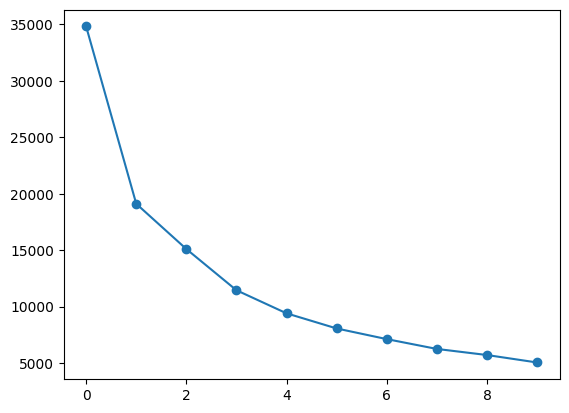

In [ ]:
from sklearn.cluster import KMeans
# find the no.of clusters
inertia_train=[]
for i in np.arange(1,11):
  kmeans = KMeans(n_clusters=i)
  kmeans.fit(Scaled_train)
  inertia_train.append(kmeans.inertia_)
plt.plot(inertia_train,marker='o')

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: F

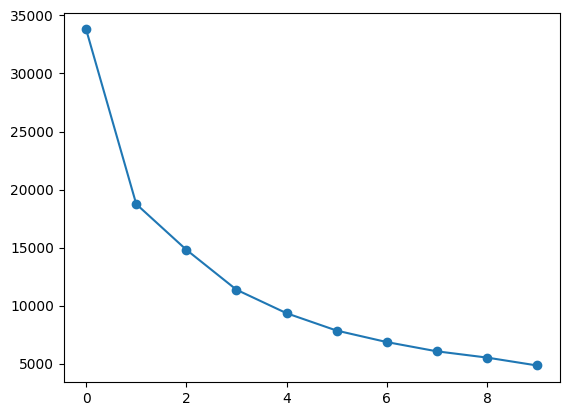

In [ ]:
inertia_test=[]
for i in np.arange(1,11):
  kmeans = KMeans(n_clusters=i)
  kmeans.fit_transform(Scaled_test)
  inertia_test.append(kmeans.inertia_)
plt.plot(inertia_test,marker='o')

\##### We get n_cluster value as 3(Using Elbow method) for both train and test dataset.

In [ ]:
# Applying the no. of clusters
# the clusters formed will be assigned labels as 0,1,2(as python starts lable from 0)
kmeans = KMeans(n_clusters=3)
kmeans.fit_transform(Scaled_train)
RFM_train['Clusters'] = (kmeans.labels_)
RFM_train

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,Recency,Frequency,Monetary,R,F,M,RFM_Segment,RFM_Score,Clusters
CustomerID,,,,,,,,,
12346.0,12,2,0.00,4,4,4,444,444.0,0
12347.0,1,132,3124.96,1,1,1,111,111.0,1
12348.0,4,20,1009.88,3,3,2,332,332.0,0
12349.0,2,50,1344.17,1,2,1,121,121.0,1
12350.0,11,11,213.30,4,4,3,443,443.0,0
...,...,...,...,...,...,...,...,...,...
18280.0,10,5,91.70,4,4,4,444,444.0,0
18281.0,7,5,59.28,4,4,4,444,444.0,0
18282.0,1,9,118.16,1,4,4,144,144.0,1


In [ ]:
# Applying the no. of clusters
# the clusters formed will be assigned labels as 0,1,2(as python starts lable from 0)
kmeans = KMeans(n_clusters=3)
kmeans.fit_transform(Scaled_test)
RFM_test['Clusters'] = (kmeans.labels_)
RFM_test

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,Recency,Frequency,Monetary,R,F,M,RFM_Segment,RFM_Score,Clusters
CustomerID,,,,,,,,,
12347.0,1,50,1185.04,1,4,4,144,144.0,0
12348.0,4,11,787.36,3,2,4,324,324.0,1
12349.0,2,23,413.38,1,3,3,133,133.0,0
12350.0,11,6,121.10,4,1,2,412,412.0,1
12352.0,2,30,76.38,1,3,1,131,131.0,0
...,...,...,...,...,...,...,...,...,...
18280.0,10,5,88.90,4,1,2,412,412.0,1
18281.0,7,2,21.54,4,1,1,411,411.0,1
18282.0,1,4,58.44,1,1,1,111,111.0,0


In [ ]:
# if we want labels to start from 1
kmeans = KMeans(n_clusters=3)
kmeans.fit_transform(Scaled_train)
RFM_train['Clusters'] = (kmeans.labels_+1)
RFM_train

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,Recency,Frequency,Monetary,R,F,M,RFM_Segment,RFM_Score,Clusters
CustomerID,,,,,,,,,
12346.0,12,2,0.00,4,4,4,444,444.0,1
12347.0,1,132,3124.96,1,1,1,111,111.0,2
12348.0,4,20,1009.88,3,3,2,332,332.0,1
12349.0,2,50,1344.17,1,2,1,121,121.0,2
12350.0,11,11,213.30,4,4,3,443,443.0,1
...,...,...,...,...,...,...,...,...,...
18280.0,10,5,91.70,4,4,4,444,444.0,1
18281.0,7,5,59.28,4,4,4,444,444.0,1
18282.0,1,9,118.16,1,4,4,144,144.0,2


In [ ]:
# if we want labels to start from 1
kmeans = KMeans(n_clusters=3)
kmeans.fit_transform(Scaled_test)
RFM_test['Clusters'] = (kmeans.labels_+1)
RFM_test

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,Recency,Frequency,Monetary,R,F,M,RFM_Segment,RFM_Score,Clusters
CustomerID,,,,,,,,,
12347.0,1,50,1185.04,1,4,4,144,144.0,1
12348.0,4,11,787.36,3,2,4,324,324.0,2
12349.0,2,23,413.38,1,3,3,133,133.0,1
12350.0,11,6,121.10,4,1,2,412,412.0,2
12352.0,2,30,76.38,1,3,1,131,131.0,1
...,...,...,...,...,...,...,...,...,...
18280.0,10,5,88.90,4,1,2,412,412.0,2
18281.0,7,2,21.54,4,1,1,411,411.0,2
18282.0,1,4,58.44,1,1,1,111,111.0,1


In [ ]:
group_train = RFM_train.groupby(['Clusters'])['Recency','Frequency','Monetary'].mean()
group_train

<ipython-input-90-ac61f04647cb>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  group_train = RFM_train.groupby(['Clusters'])['Recency','Frequency','Monetary'].mean()


,Recency,Frequency,Monetary
Clusters,,,
1,7.370184,20.815187,398.536399
2,2.027865,85.727630,1592.503007
3,1.142857,1907.571429,71380.807857


In [ ]:
group_test = RFM_test.groupby(['Clusters'])['Recency','Frequency','Monetary'].mean()
group_test

<ipython-input-91-117625041f13>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  group_test = RFM_test.groupby(['Clusters'])['Recency','Frequency','Monetary'].mean()


,Recency,Frequency,Monetary
Clusters,,,
1,2.012540,36.805825,679.330890
2,7.431609,11.500575,211.455087
3,1.166667,857.500000,39004.066667


In [ ]:
# create a function to insert conditon
def func(row):
  if row['Clusters'] == 1:
    return 'Avg customers'
  elif row['Clusters'] == 2:
    return 'Lapsed customers'
  else:
    return 'Whales'

RFM_train['Conditions'] = RFM_train.apply(func,axis=1)
RFM_test['Conditions'] = RFM_test.apply(func,axis=1)

In [ ]:
RFM_train

,Recency,Frequency,Monetary,R,F,M,RFM_Segment,RFM_Score,Clusters,Conditions
CustomerID,,,,,,,,,,
12346.0,12,2,0.00,4,4,4,444,444.0,1,Avg customers
12347.0,1,132,3124.96,1,1,1,111,111.0,2,Lapsed customers
12348.0,4,20,1009.88,3,3,2,332,332.0,1,Avg customers
12349.0,2,50,1344.17,1,2,1,121,121.0,2,Lapsed customers
12350.0,11,11,213.30,4,4,3,443,443.0,1,Avg customers
...,...,...,...,...,...,...,...,...,...,...
18280.0,10,5,91.70,4,4,4,444,444.0,1,Avg customers
18281.0,7,5,59.28,4,4,4,444,444.0,1,Avg customers
18282.0,1,9,118.16,1,4,4,144,144.0,2,Lapsed customers


In [ ]:
RFM_test

,Recency,Frequency,Monetary,R,F,M,RFM_Segment,RFM_Score,Clusters,Conditions
CustomerID,,,,,,,,,,
12347.0,1,50,1185.04,1,4,4,144,144.0,1,Avg customers
12348.0,4,11,787.36,3,2,4,324,324.0,2,Lapsed customers
12349.0,2,23,413.38,1,3,3,133,133.0,1,Avg customers
12350.0,11,6,121.10,4,1,2,412,412.0,2,Lapsed customers
12352.0,2,30,76.38,1,3,1,131,131.0,1,Avg customers
...,...,...,...,...,...,...,...,...,...,...
18280.0,10,5,88.90,4,1,2,412,412.0,2,Lapsed customers
18281.0,7,2,21.54,4,1,1,411,411.0,2,Lapsed customers
18282.0,1,4,58.44,1,1,1,111,111.0,1,Avg customers


In [ ]:
Result_train = RFM_train['Conditions'].value_counts()
Result_train

Lapsed customers    2548
Avg customers       1791
Whales                14
Name: Conditions, dtype: int64

In [ ]:
Result_test = RFM_test['Conditions'].value_counts()
Result_test

Avg customers       2472
Lapsed customers    1740
Whales                12
Name: Conditions, dtype: int64

<Axes: >

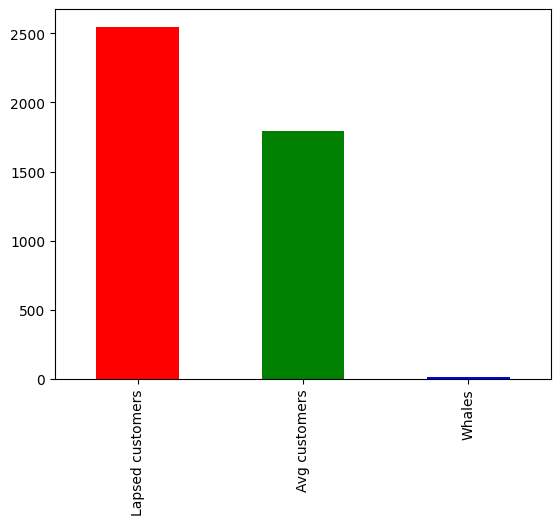

In [ ]:
# Visualize the result
Result_train.plot(kind='bar',color=['red','green','blue'])

<Axes: >

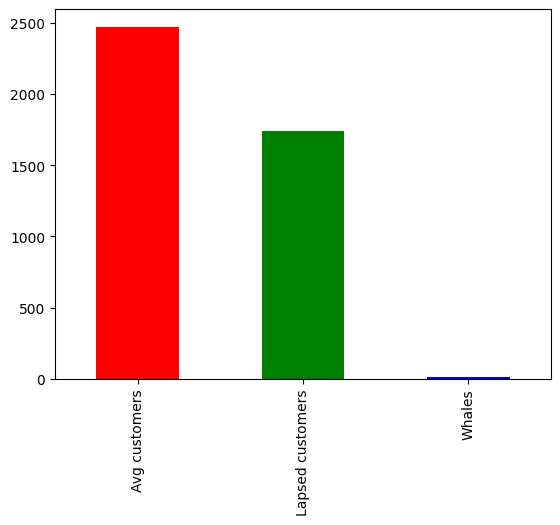

In [ ]:
# Visualize the result
Result_test.plot(kind='bar',color=['red','green','blue'])

##### From above we can infer that the no.of loyal customers are less but they give monetary value to the company also there are large no.of customers who are average buyers and can be converted into loyal customers.

In [ ]:
RFM_train.to_excel('RFM_train.xlsx')
RFM_test.to_excel('RFM_test.xlsx')